Note: We are using a reduced version of the original dataset of the project **"SASA: Source-Aware Self-Attention for IP Hijack Detection"** since we have limited RAM on the free version of Google Colab.

The Link to **our** reduced dataset and **prediction.csv**: https://drive.google.com/drive/folders/1_4hCksTHyGqHd8G8gPyBJvCb9IQHqV-h?usp=sharing

Before you start, you have to download the datasets and change the path to the files in the code.

In [ ]:
!git clone https://github.com/Becker99/Computer-Networks.git

Cloning into 'Computer-Networks'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 131 (delta 10), reused 3 (delta 3), pack-reused 97
Receiving objects: 100% (131/131), 13.87 MiB | 25.22 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [7]:
import os

# Define the desired directory path
new_directory = '/content/Computer-Networks/BGP/Geo Routes Classification for IP Hijack Detection'

# Change the current working directory
os.chdir(new_directory)

In [8]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 33.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [9]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from google.colab import drive

In [10]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this cell, we are loading the training and test datasets from pickle files. After loading the data, we display the structure of both datasets using the head() function to show the first few rows of each dataset.

In [11]:
# Load training data
train_data_path = '/content/drive/MyDrive/dataset_b_noisy_7_agents_training.pkl'
train_data = pd.read_pickle(train_data_path)

# Load test data
test_data_path = '/content/drive/MyDrive/dataset_b_noisy_7_agents_test.pkl'
test_data = pd.read_pickle(test_data_path)

# Display structure of data
print("Training Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Training Data:
          srcAS  destAS srcCC destCC  num_hops  \
trid                                             
1925684   20473    1906    US     US         9   
5107809  138062   60015    ID     GB         9   
905831    14061   14813    US     BB        10   
2678331   16276    4764    FR     AU         8   
5064705  138062   25019    ID     SA         2   

                                                       lat  \
trid                                                         
1925684  [48.860001000000004, 40.714271999999994, 40.71...   
5107809  [-6.214620000000001, -6.214620000000001, -6.21...   
905831   [50.115520000000004, 50.115520000000004, 50.11...   
2678331  [0.0, 0.0, 0.0, 0.0, 1.28967, 1.28967, 1.28967...   
5064705                      [-6.214620000000001, 1.28967]   

                                                      long  \
trid                                                         
1925684  [2.34444, -74.005966, -74.005966, -74.005997, ...   
5107809  [106

In this cell, we reload the training data for clarity and preprocess it for training a machine learning model. We create a binary target variable, 'malicious_label', by considering the 'owner' column, where 1 indicates a malicious route and 0 indicates a non-malicious route. We then select the numerical features ('num_hops', 'vf', 'combined', 'geo') and split the data into training and validation sets using the train_test_split function. This separation is essential for training and evaluating the model's performance. The random state is set for reproducibility.

In [12]:
# Load data again for clarity
df_train = pd.read_pickle(train_data_path)

# Assume 'owner' indicates if a route is malicious (1) or not (0)
df_train['malicious_label'] = (df_train['owner'] == 1).astype(int)

# Select numerical features
numerical_features = ['num_hops', 'vf', 'combined', 'geo']

# Select features from DataFrame
X_numerical = df_train[numerical_features]

# Select target variable
y = df_train['malicious_label']

# Train-Test split
X_train, X_valid, y_train, y_valid = train_test_split(X_numerical, y, test_size=0.2, random_state=42)


In this cell, we initialize a Random Forest model with 100 estimators and a fixed random state for reproducibility. Subsequently, we train the model using the training data (X_train and y_train). The Random Forest algorithm is a popular ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or the average prediction (regression) of the individual trees.

In [13]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In this section, we use the trained Random Forest model to make predictions on the validation data (X_valid). Subsequently, we evaluate the model's performance by calculating the accuracy, which is the ratio of correctly predicted instances to the total number of instances in the validation set. The accuracy score is printed for assessment.

In [14]:
# Predictions on validation data
y_pred = rf_model.predict(X_valid)

# Evaluate model performance
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9970600827743685


In this cell, we select the relevant features from the test data (X_test) that match the features used during the model training. The trained Random Forest model is then utilized to predict the labels on the test data. These predictions are added to the test data, and the resulting structure is displayed. Additionally, the test data with predictions is saved to a CSV file for further reference.

In [15]:
# Features from test data (matching the features used during training)
X_test = test_data[['num_hops', 'vf', 'combined', 'geo']]

# Predictions on test data
y_test_pred = rf_model.predict(X_test)

# Add predictions to test data
test_data['predictions'] = y_test_pred

# Display the structure of test data with predictions
print("Test Data with Predictions:")
print(test_data[['num_hops', 'vf', 'combined', 'geo', 'owner', 'predictions']])

# Save test data with predictions to a CSV file
test_data.to_csv('/content/drive/MyDrive/test_predictions.csv', index=False)


Test Data with Predictions:
         num_hops  vf  combined  geo  owner  predictions
trid                                                    
1489583         5   0         0    0      0            0
3948141         7   0         0    0      0            0
720512          8   0         0    0      0            0
4159893        24   2         1    0      1            1
2357682        10   0         0    0      0            0
...           ...  ..       ...  ...    ...          ...
42641          13   0         0    0      0            0
133464          7   0         0    0      0            0
1427067        17   0         1    1      0            0
2251553         7   0         0    0      0            0
184698          9   0         0    0      0            0

[70238 rows x 6 columns]



In this section, we perform cross-validation using StratifiedKFold, which is suitable for classification tasks with imbalanced class ratios. Additional metrics, including precision, recall, and F1-score, are computed during cross-validation. Furthermore, the confusion matrices are created for each fold, and their averages are calculated. The final results, including average precision, recall, F1-score, and the average confusion matrix, are printed.

In [16]:
# Cross-validation with StratifiedKFold (supports classification with imbalanced class ratios)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Additional metrics during cross-validation
precision_scores = cross_val_score(rf_model, X_numerical, y, cv=cv, scoring='precision')
recall_scores = cross_val_score(rf_model, X_numerical, y, cv=cv, scoring='recall')
f1_scores = cross_val_score(rf_model, X_numerical, y, cv=cv, scoring='f1')

# Confusion Matrix creation during cross-validation
conf_matrices = []
for train_index, test_index in cv.split(X_numerical, y):
    X_train_cv, X_test_cv = X_numerical.iloc[train_index], X_numerical.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    rf_model.fit(X_train_cv, y_train_cv)
    y_pred_cv = rf_model.predict(X_test_cv)

    conf_matrices.append(confusion_matrix(y_test_cv, y_pred_cv))

# Calculate average values for the metrics
avg_precision = precision_scores.mean()
avg_recall = recall_scores.mean()
avg_f1 = f1_scores.mean()

# Calculate average Confusion Matrix
avg_conf_matrix = sum(conf_matrices) // len(conf_matrices)

# Output the results
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1)
print("\nAverage Confusion Matrix:")
print(avg_conf_matrix)


Average Precision: 0.951716904087494
Average Recall: 0.611023622047244
Average F1-Score: 0.7437025113134438

Average Confusion Matrix:
[[34773     7]
 [   98   155]]


In this part, we select the relevant features from the test data, which match the features used during the training phase. We then use the trained Random Forest model to make predictions on the test data. These predictions are added to the test data for further analysis. Additionally, we create a binary 'malicious_label' column based on the assumption that 'owner' indicates whether a route is marked as malicious (1) or not (0). The resulting 'y_test' variable holds the true labels for the test data.

In [17]:
# Select features from the test data (corresponding to the features used during training)
X_test = test_data[['num_hops', 'vf', 'combined', 'geo']]

# Make predictions on the test data
y_test_pred = rf_model.predict(X_test)

# Add predictions to the test data
test_data['predictions'] = y_test_pred

# Assume: 'owner' is a column indicating whether a route is marked as malicious (1) or not (0).
test_data['malicious_label'] = (test_data['owner'] == 1).astype(int)
y_test = test_data['malicious_label']


In this section, we compute the confusion matrix based on the true labels (y_test) and the predicted labels (y_test_pred). The confusion matrix is then visualized using a heatmap for better interpretation. Additionally, we output the classification report, which includes precision, recall, F1-score, and other metrics, providing a comprehensive assessment of the model's performance on the test data.

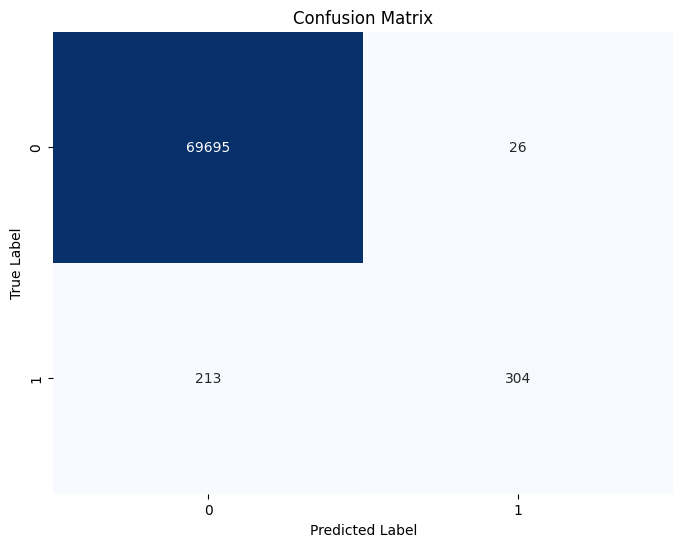

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     69721
           1       0.92      0.59      0.72       517

    accuracy                           1.00     70238
   macro avg       0.96      0.79      0.86     70238
weighted avg       1.00      1.00      1.00     70238



In [18]:
# Calculate the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Output the Classification Report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)
